In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device(3)

In [3]:
PATH = Path('VOC2007/PASCAL_VOC')
list(PATH.iterdir())

[PosixPath('VOC2007/PASCAL_VOC/train.json')]

In [4]:
trn_j = json.load((PATH/'train.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES]

[{'file_name': '32.jpg', 'height': 480, 'width': 640, 'id': 32},
 {'file_name': '11.jpg', 'height': 600, 'width': 800, 'id': 11},
 {'file_name': '33.jpg', 'height': 480, 'width': 640, 'id': 33},
 {'file_name': '38.jpg', 'height': 600, 'width': 800, 'id': 38},
 {'file_name': '40.jpg', 'height': 600, 'width': 800, 'id': 40},
 {'file_name': '31.jpg', 'height': 600, 'width': 800, 'id': 31},
 {'file_name': '36.jpg', 'height': 600, 'width': 800, 'id': 36},
 {'file_name': '13.jpg', 'height': 480, 'width': 640, 'id': 13},
 {'file_name': '1.jpg', 'height': 360, 'width': 640, 'id': 1},
 {'file_name': '5.jpg', 'height': 768, 'width': 1280, 'id': 5},
 {'file_name': '20.jpg', 'height': 480, 'width': 640, 'id': 20},
 {'file_name': '2.jpg', 'height': 360, 'width': 640, 'id': 2},
 {'file_name': '35.jpg', 'height': 600, 'width': 800, 'id': 35},
 {'file_name': '25.jpg', 'height': 600, 'width': 800, 'id': 25},
 {'file_name': '8.jpg', 'height': 768, 'width': 1024, 'id': 8},
 {'file_name': '26.jpg', 'heigh

In [6]:
trn_j[ANNOTATIONS][:2]

[{'area': 1116,
  'iscrowd': 0,
  'image_id': 32,
  'bbox': [264, 259, 31, 36],
  'category_id': 1,
  'id': 1,
  'ignore': 0,
  'segmentation': []},
 {'area': 828,
  'iscrowd': 0,
  'image_id': 32,
  'bbox': [321, 251, 18, 46],
  'category_id': 1,
  'id': 2,
  'ignore': 0,
  'segmentation': []}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 0, 'name': 'Dent'},
 {'supercategory': 'none', 'id': 1, 'name': 'Dislocation'},
 {'supercategory': 'none', 'id': 2, 'name': 'Large_tear_or_damage'},
 {'supercategory': 'none', 'id': 3, 'name': 'Scratch_or_spot'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [9]:
PATH = Path('VOC2007')
list((PATH).iterdir())

[PosixPath('VOC2007/Annotations'),
 PosixPath('VOC2007/SegmentationObject'),
 PosixPath('VOC2007/JPEGImages'),
 PosixPath('VOC2007/SegmentationClass'),
 PosixPath('VOC2007/tmp'),
 PosixPath('VOC2007/models'),
 PosixPath('VOC2007/ImageSets'),
 PosixPath('VOC2007/PASCAL_VOC')]

In [10]:
PATH = Path('VOC2007/JPEGImages')
list(PATH.iterdir())

[PosixPath('VOC2007/JPEGImages/28.jpg'),
 PosixPath('VOC2007/JPEGImages/33.jpg'),
 PosixPath('VOC2007/JPEGImages/34.jpg'),
 PosixPath('VOC2007/JPEGImages/20.jpg'),
 PosixPath('VOC2007/JPEGImages/9.jpg'),
 PosixPath('VOC2007/JPEGImages/5.jpg'),
 PosixPath('VOC2007/JPEGImages/37.jpg'),
 PosixPath('VOC2007/JPEGImages/31.jpg'),
 PosixPath('VOC2007/JPEGImages/1.jpg'),
 PosixPath('VOC2007/JPEGImages/26.jpg'),
 PosixPath('VOC2007/JPEGImages/12.jpg'),
 PosixPath('VOC2007/JPEGImages/25.jpg'),
 PosixPath('VOC2007/JPEGImages/10.jpg'),
 PosixPath('VOC2007/JPEGImages/29.jpg'),
 PosixPath('VOC2007/JPEGImages/0.jpg'),
 PosixPath('VOC2007/JPEGImages/11.jpg'),
 PosixPath('VOC2007/JPEGImages/27.jpg'),
 PosixPath('VOC2007/JPEGImages/13.jpg'),
 PosixPath('VOC2007/JPEGImages/4.jpg'),
 PosixPath('VOC2007/JPEGImages/16.jpg'),
 PosixPath('VOC2007/JPEGImages/24.jpg'),
 PosixPath('VOC2007/JPEGImages/19.jpg'),
 PosixPath('VOC2007/JPEGImages/7.jpg'),
 PosixPath('VOC2007/JPEGImages/38.jpg'),
 PosixPath('VOC2007/JP

In [11]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('32.jpg', 32)

In [12]:
def hw_bb(bb): return np.array([bb[1], bb[2], bb[3]+bb[0]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

33

In [13]:
im_a = trn_anno[im0_d[ID]];im_a

[(array([259,  31, 299, 294]), 1),
 (array([251,  18, 366, 338]), 1),
 (array([301,  18, 347, 345]), 1)]

In [14]:
im0_a = im_a[0]; im0_a

(array([259,  31, 299, 294]), 1)

In [15]:
cats[3]

'Scratch_or_spot'

In [16]:
trn_anno[0]

[(array([159,  67, 353, 380]), 4)]

In [17]:
cats[2],cats[3]

('Large_tear_or_damage', 'Scratch_or_spot')

In [18]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [19]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [20]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [196  96 155 233]'

In [21]:
IMG_PATH = Path('VOC2007/JPEGImages')
im = open_image(IMG_PATH/im0_d[FILE_NAME])

In [22]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [23]:
def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

In [24]:
def draw_rect(ax, b):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor='white', lw=2))
    draw_outline(patch, 4)

In [25]:
def draw_text(ax, xy, txt, sz=14):
    text = ax.text(*xy, txt,
        verticalalignment='top', color='white', fontsize=sz, weight='bold')
    draw_outline(text, 1)

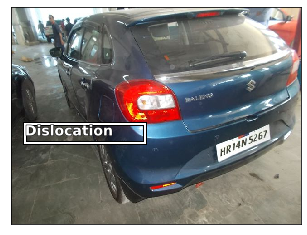

In [26]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [27]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [28]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

(600, 800, 3)


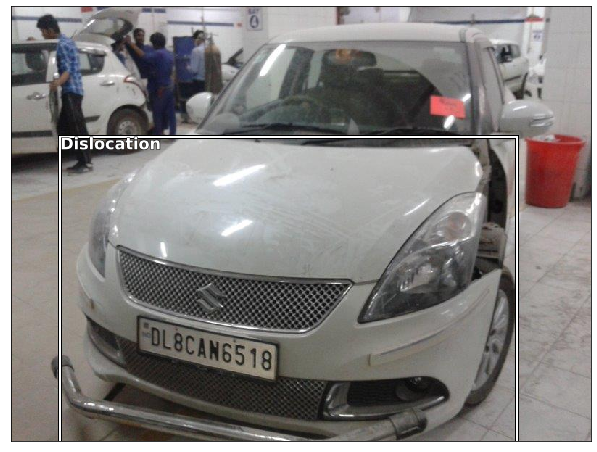

In [29]:
draw_idx(4)

In [30]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [31]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [32]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

In [33]:
trn_lrg_anno

{32: (array([251,  18, 366, 338]), 1),
 11: (array([390,  46, 524, 533]), 3),
 33: (array([119,  55, 437, 401]), 4),
 38: (array([297,  40, 497, 428]), 5),
 40: (array([160, 122, 636, 617]), 3),
 31: (array([233, 130, 481, 535]), 0),
 36: (array([366,  45, 609, 618]), 3),
 13: (array([ 89, 389, 325, 511]), 2),
 1: (array([127, 115, 349, 375]), 4),
 5: (array([234,  94, 647, 667]), 4),
 20: (array([310,  51, 627, 599]), 0),
 2: (array([  8, 123, 249, 317]), 3),
 35: (array([282,  19, 399, 371]), 3),
 25: (array([134, 235, 306, 431]), 0),
 8: (array([100, 382, 878, 809]), 2),
 26: (array([ 84, 185, 410, 421]), 0),
 0: (array([159,  67, 353, 380]), 4),
 7: (array([208, 369, 501, 613]), 1),
 27: (array([251,  27, 694, 554]), 1),
 28: (array([222, 201, 539, 575]), 1),
 24: (array([222, 182, 360, 379]), 0),
 29: (array([310,  48, 680, 667]), 5),
 37: (array([183,  91, 632, 684]), 3),
 4: (array([180,  68, 835, 697]), 1),
 16: (array([378,  42, 468, 470]), 0),
 6: (array([198,  41, 247, 181])

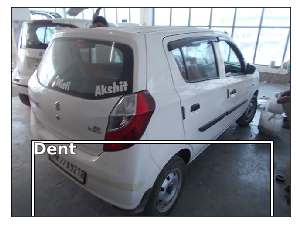

In [34]:
b,c = trn_lrg_anno[20]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[20]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [35]:
PATH = Path('VOC2007')

In [36]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [37]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [38]:
f_model = resnet34
sz=224
bs=64

In [39]:
JPEGS = 'JPEGImages'


tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, crop_type=CropType.NO)
md = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms, bs=bs)

In [40]:
x,y=next(iter(md.val_dl))

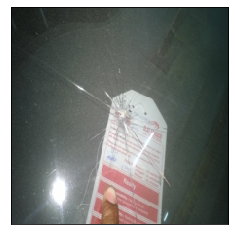

In [41]:
show_img(md.val_ds.denorm(to_np(x))[0]);

In [42]:
learn = ConvLearner.pretrained(f_model, md, metrics=[accuracy])
learn.opt_fn = optim.Adam

In [43]:
lrf=learn.lr_find(1e-5,100)

epoch      trn_loss   val_loss   accuracy                
    0      2.618062   9.190185   0.166667  



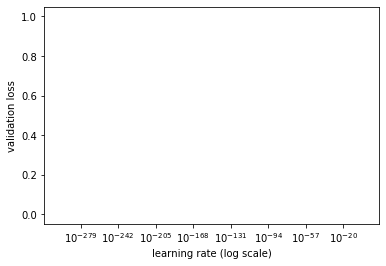

In [44]:
learn.sched.plot()

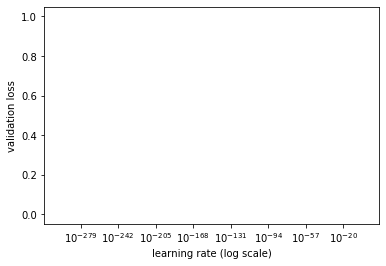

In [45]:
learn.sched.plot(n_skip=5, n_skip_end=1)

In [46]:
lr = 2e-2

In [47]:
learn.fit(lr, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      3.145224   8.981837   0.166667  



[8.981837272644043, 0.1666666716337204]

In [48]:
lrs = np.array([lr/1000,lr/100,lr])

In [49]:
learn.freeze_to(-2)

epoch      trn_loss   val_loss   accuracy                
    0      2.377078   7.420238   0.166667  



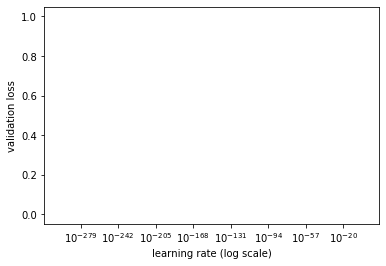

In [50]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [51]:
learn.fit(lrs/5, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                
    0      2.885236   7.055389   0.166667  



[7.055388927459717, 0.1666666716337204]

In [52]:
learn.unfreeze()

In [53]:
learn.fit(lrs/5, 5, cycle_len=4)

epoch      trn_loss   val_loss   accuracy                
    0      2.758665   5.9473     0.166667  
    1      2.599634   2.766796   0.166667                
    2      1.916247   1.848111   0.333333                
    3      1.516761   1.485348   0.333333                
    4      1.212912   0.976355   0.5                     
    5      1.004647   0.882776   0.333333                
    6      0.854996   0.848613   0.5                     
    7      0.741514   0.753822   0.666667                
    8      0.655428   0.748709   0.833333                
    9      0.586162   0.76102    0.833333                
    10     0.527959   0.71512    0.833333                
    11     0.481813   0.709644   0.833333                
    12     0.440739   0.719376   0.833333                
    13     0.405113   0.732946   0.833333                
    14     0.374211   0.757702   0.833333                
    15     0.348183   0.761788   0.833333                
    16     0.32432    0.7788

[0.8295565247535706, 0.8333333134651184]

In [54]:
learn.save('clas_one')

In [55]:
learn.load('clas_one')

In [56]:
x,y = next(iter(md.val_dl))
probs = F.softmax(predict_batch(learn.model, x), -1)
x,preds = to_np(x),to_np(probs)
preds = np.argmax(preds, -1)

IndexError: index 6 is out of bounds for axis 0 with size 6

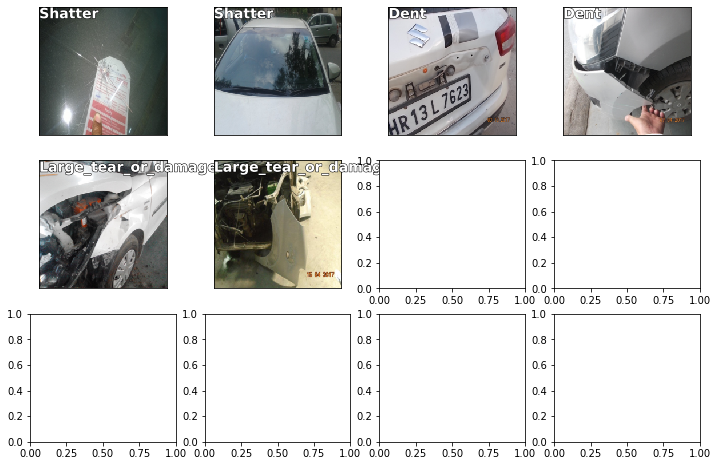

In [57]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(x)[i]
    b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

In [ ]:
chhvjhv

In [ ]:
BB_CSV = PATH/'tmp/bb.csv'

In [ ]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [ ]:
BB_CSV.open().readlines()[:5]

In [ ]:
f_model=resnet34
sz=224
bs=64

In [ ]:
augs = [RandomFlip(), 
        RandomRotate(30),
        RandomLighting(0.1,0.1)]

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

In [ ]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [ ]:
augs = [RandomFlip(tfm_y=TfmType.COORD),
        RandomRotate(30, tfm_y=TfmType.COORD),
        RandomLighting(0.1,0.1, tfm_y=TfmType.COORD)]

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)

In [ ]:
idx=3
fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=next(iter(md.aug_dl))
    ima=md.val_ds.denorm(to_np(x))[idx]
    b = bb_hw(to_np(y[idx]))
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)

In [ ]:
tfm_y = TfmType.COORD
augs = [RandomFlip(tfm_y=tfm_y),
        RandomRotate(3, p=0.5, tfm_y=tfm_y),
        RandomLighting(0.05,0.05, tfm_y=tfm_y)]

tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=tfm_y, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, bs=bs, continuous=True)

In [ ]:
512*7*7

In [ ]:
head_reg4 = nn.Sequential(Flatten(), nn.Linear(25088,4))
learn = ConvLearner.pretrained(f_model, md, custom_head=head_reg4)
learn.opt_fn = optim.Adam
learn.crit = nn.L1Loss()

In [ ]:
learn.summary()

In [ ]:
learn.lr_find(1e-5,100)
learn.sched.plot(5)

In [ ]:
lr = 2e-3

In [ ]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

In [ ]:
lrs = np.array([lr/100,lr/10,lr])

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrf=learn.lr_find(lrs/1000)
learn.sched.plot(1)

In [ ]:
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.freeze_to(-3)

In [ ]:
learn.fit(lrs, 1, cycle_len=2)

In [ ]:
learn.save('reg4')

In [ ]:
learn.load('reg4')

In [ ]:
x,y = next(iter(md.val_dl))
learn.model.eval()
preds = to_np(learn.model(VV(x)))

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=md.val_ds.denorm(to_np(x))[i]
    b = bb_hw(preds[i])
    ax = show_img(ima, ax=ax)
    draw_rect(ax, b)
plt.tight_layout()

In [ ]:
f_model=resnet34
sz=224
bs=64

val_idxs = get_cv_idxs(len(trn_fns))

In [ ]:
tfms = tfms_from_model(f_model, sz, crop_type=CropType.NO, tfm_y=TfmType.COORD, aug_tfms=augs)
md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms,
   bs=bs, continuous=True, val_idxs=val_idxs)

In [ ]:
md2 = ImageClassifierData.from_csv(PATH, JPEGS, CSV, tfms=tfms_from_model(f_model, sz))

In [ ]:
class ConcatLblDataset(Dataset):
    def __init__(self, ds, y2): self.ds,self.y2 = ds,y2
    def __len__(self): return len(self.ds)
    
    def __getitem__(self, i):
        x,y = self.ds[i]
        return (x, (y,self.y2[i]))

In [ ]:
trn_ds2 = ConcatLblDataset(md.trn_ds, md2.trn_y)
val_ds2 = ConcatLblDataset(md.val_ds, md2.val_y)

In [ ]:
val_ds2[0][1]

In [ ]:
md.trn_dl.dataset = trn_ds2
md.val_dl.dataset = val_ds2

In [ ]:
x,y=next(iter(md.val_dl))
idx=3
ima=md.val_ds.ds.denorm(to_np(x))[idx]
b = bb_hw(to_np(y[0][idx])); b

In [ ]:
ax = show_img(ima)
draw_rect(ax, b)
draw_text(ax, b[:2], md2.classes[y[1][idx]])

In [ ]:
head_reg4 = nn.Sequential(
    Flatten(),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(25088,256),
    nn.ReLU(),
    nn.BatchNorm1d(256),
    nn.Dropout(0.5),
    nn.Linear(256,4+len(cats)),
)
models = ConvnetBuilder(f_model, 0, 0, 0, custom_head=head_reg4)

learn = ConvLearner(md, models)
learn.opt_fn = optim.Adam

In [ ]:
def detn_loss(input, target):
    bb_t,c_t = target
    bb_i,c_i = input[:, :4], input[:, 4:]
    bb_i = F.sigmoid(bb_i)*224
    # I looked at these quantities separately first then picked a multiplier
    #   to make them approximately equal
    return F.l1_loss(bb_i, bb_t) + F.cross_entropy(c_i, c_t)*20

def detn_l1(input, target):
    bb_t,_ = target
    bb_i = input[:, :4]
    bb_i = F.sigmoid(bb_i)*224
    return F.l1_loss(V(bb_i),V(bb_t)).data

def detn_acc(input, target):
    _,c_t = target
    c_i = input[:, 4:]
    return accuracy(c_i, c_t)

learn.crit = detn_loss
learn.metrics = [detn_acc, detn_l1]

In [ ]:
learn.lr_find()
learn.sched.plot()

In [ ]:
lr=1e-2

In [ ]:
learn.save('reg1_0')

In [ ]:
learn.freeze_to(-2)

In [ ]:
lrs = np.array([lr/100, lr/10, lr])

In [ ]:
learn.lr_find(lrs/1000)
learn.sched.plot(0)